#**Mutagenecity Prediction using Machine Learning**

Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem

In [19]:
df = pd.read_excel("Mutagenenicity_Dataset.xlsx")

In [20]:
print("Number of non-mutagenic compounds =",df[df.OUTCOME == 0].shape[0])
print("Number of mutagenic compounds =",df[df.OUTCOME == 1].shape[0])

Number of non-mutagenic compounds = 3009
Number of mutagenic compounds = 3503


Keeping only valid SMILES

In [21]:
# Function to check if a SMILES string is valid
def is_valid_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

# Use the function to filter out rows with invalid SMILES
df = df[df['SMILES'].apply(is_valid_smiles)]

[06:16:16] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[06:16:16] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[06:16:16] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[06:16:16] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[06:16:16] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[06:16:16] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[06:16:16] SMILES Parse Error: syntax error while parsing: CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O
[06:16:16] SMILES Parse Error: Failed parsing SMILES 'CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O' for input: 'CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O'
[06:16:16] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[06:16:16] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for inp

In [22]:
print("Number of non-mutagenic compounds =",df[df.OUTCOME == 0].shape[0])
print("Number of mutagenic compounds =",df[df.OUTCOME == 1].shape[0])

Number of non-mutagenic compounds = 3009
Number of mutagenic compounds = 3497


In [27]:
df

,SMILES,OUTCOME
0,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,0
7,CC(=O)OC1(CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)C3CCC12...,0
8,Nc1nc(N)nc(N)n1,0
9,Cc1ccc(N=Nc2c(O)ccc3ccccc23)c(c1)[N+](=O)[O-],1
10,CC(C)CC(=O)Nc1snc2ccccc12,0
...,...,...
6507,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...,0
6508,OC(Cc1cn(N=O)c2ccccc12)C(=O)O,1
6509,COC(=O)Nc1nc2ccccc2[nH]1,1
6510,ClCc1cccc2c3cccc4cccc(c12)c34,1


Calculating Molecular Descriptors using RD-kit

In [25]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule

        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm, fn in Descriptors._descList:
        # some of the descriptor functions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

# Your list of SMILES strings
smiles_list = df["SMILES"]

# Create an empty list to store dictionaries of descriptors
descriptors_list = []

# Calculate and store descriptors for each SMILES string
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        descriptors = getMolDescriptors(mol)
        # Append descriptors to the list
        descriptors_list.append(descriptors)
    else:
        print(f"Invalid SMILES: {smiles}")

# Convert the list of dictionaries to a DataFrame
df_new = pd.DataFrame(descriptors_list)

In [26]:
df_new

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.431073,14.431073,0.128988,-0.378575,0.184582,12.480000,646.614,628.470,646.116486,232,...,0,0,0,0,0,0,0,0,0,0
1,12.729807,12.729807,0.073677,-1.064645,0.649284,44.321429,406.906,379.690,406.154702,152,...,0,0,0,0,0,0,0,0,0,0
2,5.137222,5.137222,0.041667,0.041667,0.394014,9.333333,126.123,120.075,126.065394,48,...,0,0,0,0,0,0,0,0,0,0
3,11.119127,11.119127,0.025727,-0.495723,0.410633,10.478261,307.309,294.205,307.095691,114,...,0,0,0,0,0,0,0,0,0,0
4,11.632299,11.632299,0.059632,0.059632,0.885112,10.937500,234.324,220.212,234.082684,84,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,11.388617,11.388617,0.461435,-5.278185,0.133427,33.179487,658.609,632.401,657.984942,232,...,0,0,0,0,0,0,0,0,0,0
6502,10.587602,10.587602,0.057176,-1.485270,0.776182,12.529412,234.211,224.131,234.064057,88,...,0,0,0,0,0,0,0,0,0,0
6503,10.864683,10.864683,0.387083,-0.537911,0.720985,10.071429,191.190,182.118,191.069477,72,...,0,0,0,0,0,0,0,0,0,0
6504,6.088315,6.088315,0.563045,0.563045,0.406121,11.833333,250.728,239.640,250.054928,86,...,0,0,0,0,0,0,0,0,0,0


Calculating Molecular Fingerprints

In [29]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
    return np.array(Morgan_fpts)

In [30]:
Morgan_fpts = morgan_fpts(df['SMILES'])
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6502,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
final_df = pd.concat([df_new, Morgan_fingerprints], axis=1)

In [55]:
final_df['OUTCOME'] = df['OUTCOME'].values

In [56]:
final_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,OUTCOME
0,14.431073,14.431073,0.128988,-0.378575,0.184582,12.480000,646.614,628.470,646.116486,232,...,0,0,0,0,0,0,0,0,0,0
1,12.729807,12.729807,0.073677,-1.064645,0.649284,44.321429,406.906,379.690,406.154702,152,...,0,0,0,0,0,0,0,0,0,0
2,5.137222,5.137222,0.041667,0.041667,0.394014,9.333333,126.123,120.075,126.065394,48,...,0,0,0,0,0,0,0,0,0,0
3,11.119127,11.119127,0.025727,-0.495723,0.410633,10.478261,307.309,294.205,307.095691,114,...,0,0,0,0,0,0,0,0,0,1
4,11.632299,11.632299,0.059632,0.059632,0.885112,10.937500,234.324,220.212,234.082684,84,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,11.388617,11.388617,0.461435,-5.278185,0.133427,33.179487,658.609,632.401,657.984942,232,...,0,0,0,0,0,0,0,0,0,0
6502,10.587602,10.587602,0.057176,-1.485270,0.776182,12.529412,234.211,224.131,234.064057,88,...,0,0,0,0,0,0,0,0,0,1
6503,10.864683,10.864683,0.387083,-0.537911,0.720985,10.071429,191.190,182.118,191.069477,72,...,0,0,0,0,0,0,0,0,0,1
6504,6.088315,6.088315,0.563045,0.563045,0.406121,11.833333,250.728,239.640,250.054928,86,...,0,0,0,0,0,0,0,0,0,1


In [57]:
columns_with_nan = final_df.columns[final_df.isnull().any()]
nan_counts = final_df[columns_with_nan].isnull().sum()
nan_counts

MaxPartialCharge       10
MinPartialCharge       10
MaxAbsPartialCharge    10
MinAbsPartialCharge    10
BCUT2D_MWHI            10
BCUT2D_MWLOW           10
BCUT2D_CHGHI           10
BCUT2D_CHGLO           10
BCUT2D_LOGPHI          10
BCUT2D_LOGPLOW         10
BCUT2D_MRHI            10
BCUT2D_MRLOW           10
dtype: int64

Imputing missing values with mean

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

final_df = pd.DataFrame(imputer.fit_transform(final_df), columns=final_df.columns)

In [62]:
columns_with_nan = final_df.columns[final_df.isnull().any()]
nan_counts = final_df[columns_with_nan].isnull().sum()
nan_counts

Series([], dtype: float64)

Assigning Input features and Target variable

In [63]:
X = final_df.iloc[:, :-1]

In [67]:
X.shape

(6506, 2258)

In [65]:
y = final_df["OUTCOME"].values

Deleting features with zero vairiance

In [68]:
from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold()
variance_threshold.fit(X)
X = X.iloc[:,variance_threshold.get_support()]

In [69]:
X.shape

(6506, 2253)

Deleting highly correlated features

In [70]:
def remove_collinear_features(x, threshold):
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [71]:
X = remove_collinear_features(X, 0.8)
X.shape

Removed Columns {'Col_1449', 'Col_816', 'fr_NH2', 'NumAliphaticRings', 'Chi2v', 'fr_nitro_arom', 'NumSaturatedRings', 'fr_benzene', 'fr_phos_ester', 'SlogP_VSA2', 'NumValenceElectrons', 'MaxEStateIndex', 'FpDensityMorgan2', 'fr_C_O', 'Col_1667', 'NumHAcceptors', 'Col_715', 'SlogP_VSA6', 'EState_VSA10', 'Chi1', 'SlogP_VSA5', 'EState_VSA1', 'fr_Ar_N', 'VSA_EState10', 'Col_456', 'LabuteASA', 'fr_phenol_noOrthoHbond', 'Kappa2', 'fr_phenol', 'BCUT2D_MRHI', 'Chi0v', 'Kappa1', 'MolMR', 'HeavyAtomMolWt', 'RingCount', 'BCUT2D_LOGPHI', 'Chi4n', 'fr_nitro_arom_nonortho', 'Chi3n', 'Col_790', 'fr_Al_OH_noTert', 'Col_1195', 'Chi3v', 'NumHDonors', 'fr_Nhpyrrole', 'MaxAbsPartialCharge', 'fr_COO', 'BertzCT', 'Col_753', 'HallKierAlpha', 'BCUT2D_LOGPLOW', 'fr_nitrile', 'Col_794', 'Col_1814', 'Chi0', 'Col_838', 'Chi2n', 'fr_C_O_noCOO', 'Col_1457', 'Col_716', 'NumSaturatedHeterocycles', 'Chi4v', 'Col_1171', 'Col_1384', 'Col_1963', 'Chi1n', 'Col_1305', 'ExactMolWt', 'NOCount', 'Chi0n', 'fr_halogen', 'Chi1v'

(6506, 2169)

Test-Train split for ML model

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the Data

In [73]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Selection of suitable algortithm

In [74]:
!pip install lazypredict

In [75]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [05:56<00:13, 13.54s/it]

[LightGBM] [Info] Number of positive: 2801, number of negative: 2403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17436
[LightGBM] [Info] Number of data points in the train set: 5204, number of used features: 1373
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538240 -> initscore=0.153259
[LightGBM] [Info] Start training from score 0.153259


100%|██████████| 29/29 [05:58<00:00, 12.38s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.82     0.82      0.82   
ExtraTreesClassifier               0.82               0.82     0.82      0.82   
LGBMClassifier                     0.82               0.82     0.82      0.82   
XGBClassifier                      0.82               0.82     0.82      0.82   
BaggingClassifier                  0.79               0.79     0.79      0.79   
SVC                                0.79               0.79     0.79      0.79   
NuSVC                              0.79               0.79     0.79      0.79   
DecisionTreeClassifier             0.75               0.75     0.75      0.75   
AdaBoostClassifier                 0.75               0.75     0.75      0.75   
RidgeClassifierCV                  0.74               0.73     0.73      0.73   
KNeighborsClassifier        

Classification using Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [89]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [90]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.82642089093702


In [91]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       606
         1.0       0.84      0.84      0.84       696

    accuracy                           0.83      1302
   macro avg       0.83      0.83      0.83      1302
weighted avg       0.83      0.83      0.83      1302



In [92]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[493 113]
 [113 583]]


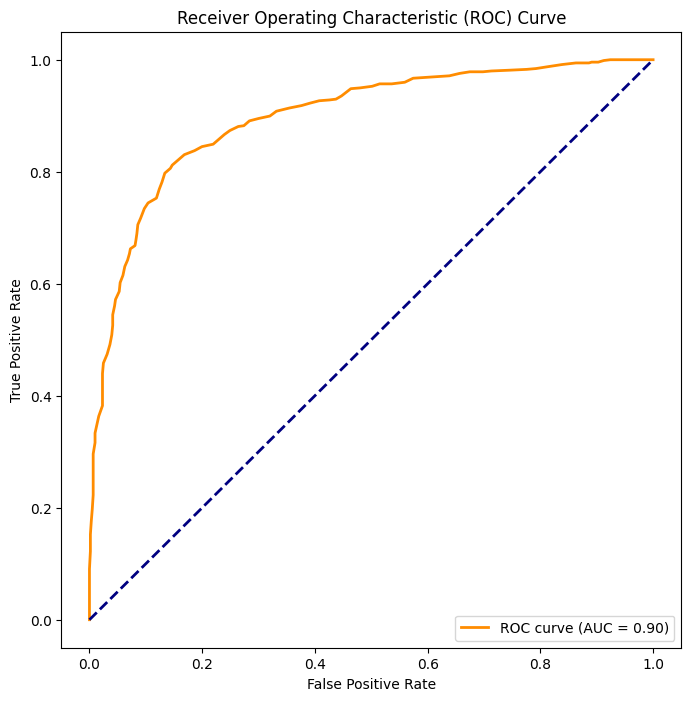

In [93]:
# Get predicted probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()